## Practical Work 4

For this practical work, the student will have to develop a Python program that is able to implement the accelerated gradient descent methods with adaptive learning rate <b>(Adagrad, RMSProp, and Adam)</b> in order to achieve the linear regression of a set of datapoints.

#### Import numpy, matplotlib.pyplot and make it inline

In [1]:
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

To have a dataset or set of data points, the student must generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that: 
<b>yi = a*xi + b (and a = -1, b = 2)</b>


In [2]:
X=np.linspace(0,20,50)
y=(-2)*X+1

#### Plot your data points. 

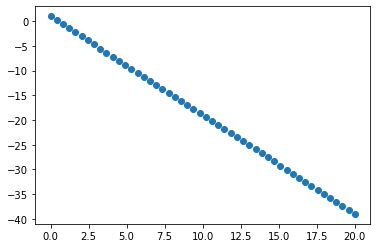

In [3]:
plt.scatter(X, y)
plt.show()

## Adagrad

### For a single variable linear regression ML model, build a function to find the optimum Theta_0 and Theta_1 parameters using Adagrad optimization algorithm.
#### The funtion should have the following input parameters:
##### 1. Input data as a matrix (or vector based on your data).
##### 2. Target label as a vector.
##### 3. Learning rate.
##### 4. Epsilon.
##### 5. Maximum number of iterations (Epochs).
#### The funtion should return the following outputs:
##### 1. All predicted Theta_0 in all iterations.
##### 2. All predicted Theta_1 in all iterations.
##### 3. Corresponding loss for each Theta_0 and Theta_1 predictions.
##### 4.All hypothesis outputs (prdicted labels) for each Theta_0 and Theta_1 predictions.
##### 5.Final Optimum values of Theta_0 and Theta_1.
#### Choose the suitable number of iterations, learning rate, Epsilon, and stop criteria.
#### Calculate r2 score. Shouldn't below 0.9
#### Plot the required curves (loss-epochs, loss-theta0, loss-theta1, all fitted lines per epoch (single graph), best fit line)
#### Try different values of the huperparameters and see the differnce in your results.

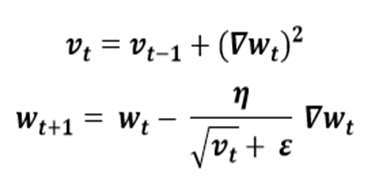

In [4]:
def Adagrad(X,y,epochs,convegrance,alpha,epslion=1e-8):
    theta_0,theta_1, vt_0,vt_1=0,0,0,0
    loss=[]
    theta0List=[]
    theta1List=[]
    m=(X.shape)[0]
    
    for count in range (epochs):   
        ypredicted=theta_0+theta_1*X
        MSE_1=(np.sum((ypredicted-y)**2)/(2*m))
        gra_0=(np.sum(ypredicted-y)/m)
        gra_1=((np.sum(((ypredicted-y).reshape(-1,1))*X.reshape(-1,1))/m))
        vt_0= vt_0+(gra_0)**2
        vt_1= vt_1+(gra_1)**2
        theta_0= theta_0 - (alpha*gra_0)/(np.sqrt(vt_0)+epslion)
        theta_1= theta_1 - (alpha*gra_1)/(np.sqrt(vt_1)+epslion)
        theta0List.append(theta_0)
        theta1List.append(theta_1)
        ypredicted=theta_0+theta_1*X
        MSE_2=(np.sum((ypredicted-y)**2)/(2*m))
        losss=MSE_1-MSE_2
        loss.append(MSE_2)
        
        if np.linalg.norm(losss)< convegrance:
            print("iterations= ",count)
            return  ypredicted,theta0List,theta1List,loss,theta_0,theta_1
        
        
    print("Not successful")   
    return  ypredicted,theta0List,theta1List,loss,theta_0,theta_1

In [5]:
y_predicted,theta_1,theta_0,loss,th0,th1= Adagrad(X,y,4000,0.0001,0.1)

iterations=  3297


The Score of the Adagrad trial 1 is=
0.9970899245848154


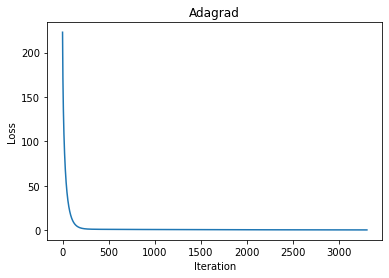

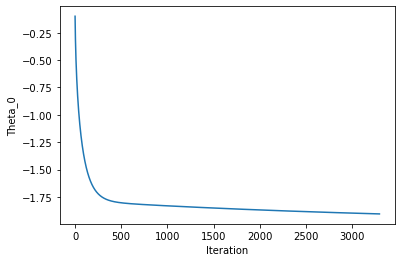

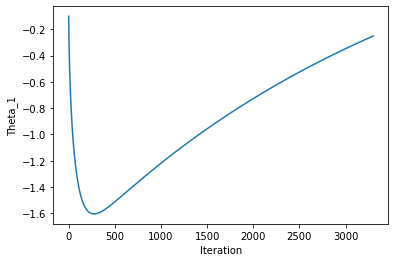

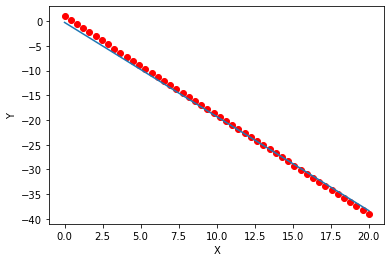

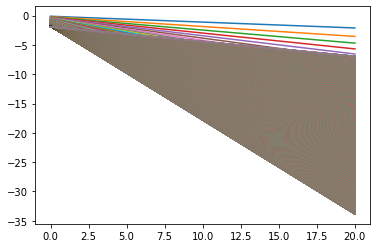

In [6]:
print("The Score of the Adagrad trial 1 is=")
print(r2_score(y,y_predicted))
plt.plot(loss)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title("Adagrad")
plt.show()
plt.plot(theta_0)
plt.xlabel('Iteration')
plt.ylabel('Theta_0')
plt.show()
plt.plot(theta_1)
plt.xlabel('Iteration')
plt.ylabel('Theta_1')
plt.show()
ynew=th0+th1*X
plt.plot(X,ynew)
plt.scatter(X, y,color='red')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()
for i in range(len(theta_0)):
    h0=theta_0[i]+theta_1[i]*X
    plt.plot(X,h0)
plt.show()


In [7]:
y_predicted,theta_1,theta_0,loss,th0,th1= Adagrad(X,y,4000,0.001,0.5)

iterations=  261


The Score of the Adagrad trial 2 is=
0.9982527524125183


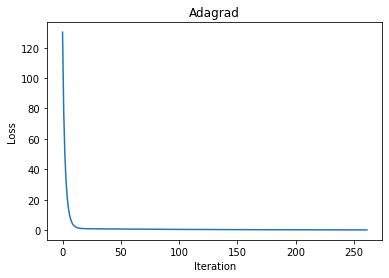

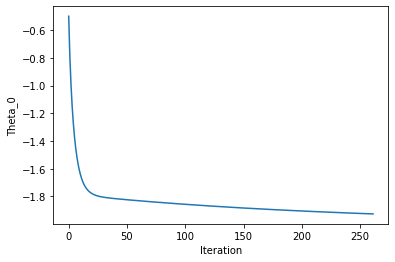

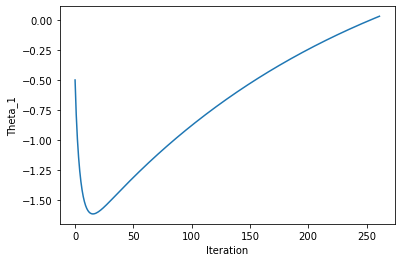

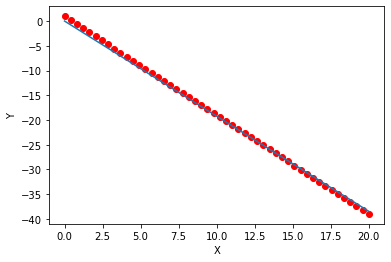

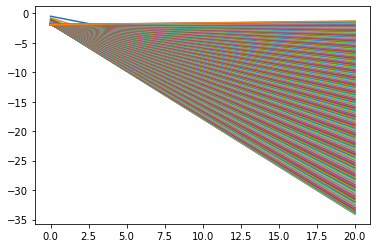

In [8]:
print("The Score of the Adagrad trial 2 is=")
print(r2_score(y,y_predicted))
plt.plot(loss)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title("Adagrad")
plt.show()
plt.plot(theta_0)
plt.xlabel('Iteration')
plt.ylabel('Theta_0')
plt.show()
plt.plot(theta_1)
plt.xlabel('Iteration')
plt.ylabel('Theta_1')
plt.show()
ynew=th0+th1*X
plt.plot(X,ynew)
plt.scatter(X, y,color='red')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()
for i in range(len(theta_0)):
    h0=theta_0[i]+theta_1[i]*X
    plt.plot(X,h0)
plt.show()


## RMSProp

### Update the previos implementation to be RMSProp.
#### Compare your results with Adagrad results.

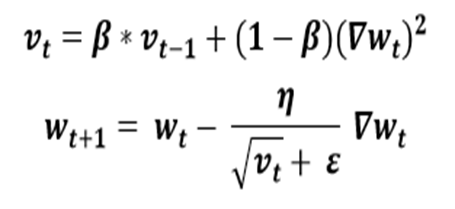

In [9]:
def RmsProp(X,y,epochs,convegrance,alpha,beta,epslion=1e-8):
    theta_0,theta_1,vt_0, vt_1=0,0,0,0
    loss=[]
    theta0List=[]
    theta1List=[]
    m=(X.shape)[0]

    for count in range (epochs):
        
        ypredicted=theta_0+theta_1*X
        MSE_1=(np.sum((ypredicted-y)**2)/(2*m))
        gra_0=(np.sum(ypredicted-y)/m)
        gra_1=((np.sum(((ypredicted-y).reshape(-1,1))*X.reshape(-1,1))/m))
        vt_0= beta*vt_0+((1-beta)*((gra_0)**2))
        vt_1= beta*vt_1+((1-beta)*((gra_1)**2))
        theta_0= theta_0 - (alpha*gra_0)/(np.sqrt(vt_0)+epslion)
        theta_1= theta_1 - (alpha*gra_1)/(np.sqrt(vt_1)+epslion)
        ypredicted=theta_0+theta_1*X
        MSE_2=(np.sum((ypredicted-y)**2)/(2*m))
        losss=MSE_1-MSE_2
        loss.append(MSE_2)
        theta0List.append(theta_0)
        theta1List.append(theta_1)
        
        if np.linalg.norm(losss)< convegrance:
            print("iterations= ",count)
            return  ypredicted,theta0List,theta1List,loss,theta_0,theta_1
        
            

    print("Not successful")   
    return  ypredicted,theta0List,theta1List,loss,theta_0,theta_1

In [10]:
y_predicted,theta_1,theta_0,loss,th0,th1= RmsProp(X,y,4000,0.000001,0.05,0.9)

iterations=  299


The Score of the RMSProp trial 1 is=
0.9992991145581103


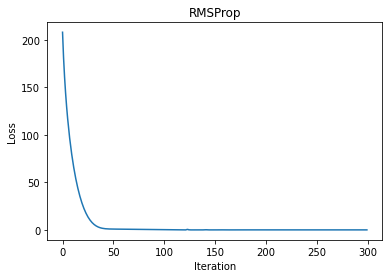

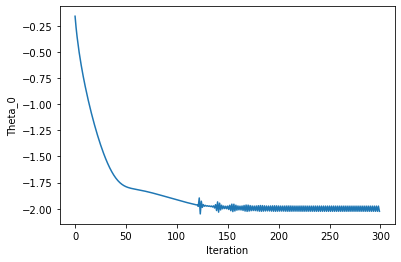

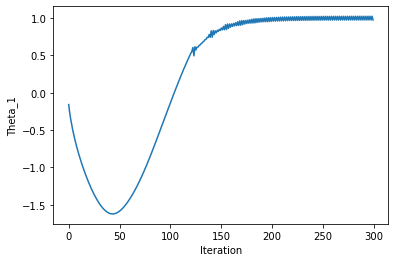

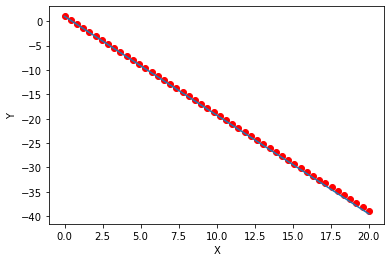

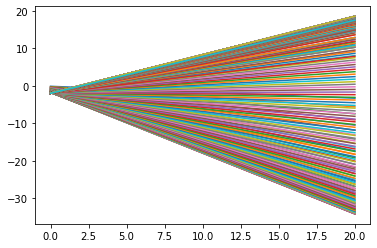

In [11]:
print("The Score of the RMSProp trial 1 is=")
print(r2_score(y,y_predicted))
plt.plot(loss)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title("RMSProp")
plt.show()
plt.plot(theta_0)
plt.xlabel('Iteration')
plt.ylabel('Theta_0')
plt.show()
plt.plot(theta_1)
plt.xlabel('Iteration')
plt.ylabel('Theta_1')
plt.show()
ynew=th0+th1*X
plt.plot(X,ynew)
plt.scatter(X, y,color='red')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()
for i in range(len(theta_0)):
    h0=theta_0[i]+theta_1[i]*X
    plt.plot(X,h0)
plt.show()


In [12]:
y_predicted,theta_1,theta_0,loss,th0,th1= RmsProp(X,y,4000,0.000001,0.5,0.5)

iterations=  176


The Score of the RMSProp trial 2 is=
0.9298802859001337


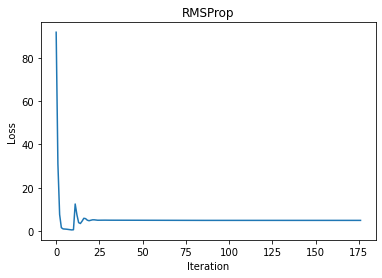

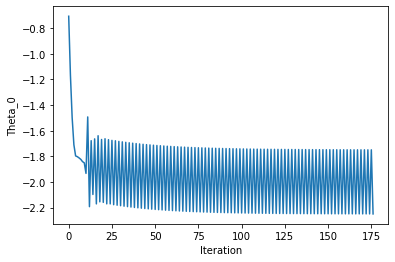

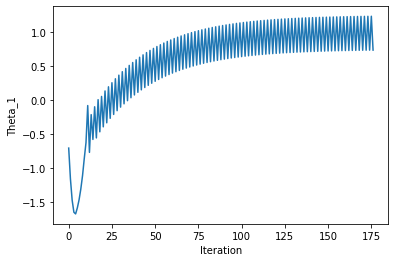

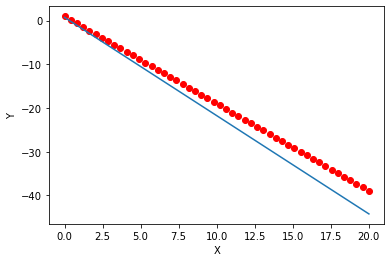

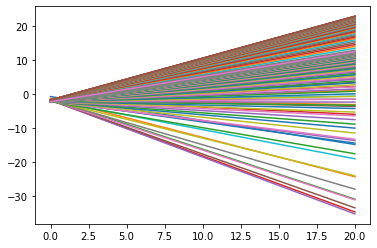

In [13]:
print("The Score of the RMSProp trial 2 is=")
print(r2_score(y,y_predicted))
plt.plot(loss)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title("RMSProp")
plt.show()
plt.plot(theta_0)
plt.xlabel('Iteration')
plt.ylabel('Theta_0')
plt.show()
plt.plot(theta_1)
plt.xlabel('Iteration')
plt.ylabel('Theta_1')
plt.show()
ynew=th0+th1*X
plt.plot(X,ynew)
plt.scatter(X, y,color='red')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()
for i in range(len(theta_0)):
    h0=theta_0[i]+theta_1[i]*X
    plt.plot(X,h0)
plt.show()


## Adam

### Update the previos implementation to be Adam.
#### Compare your results with Adagrad and RMSProp results.

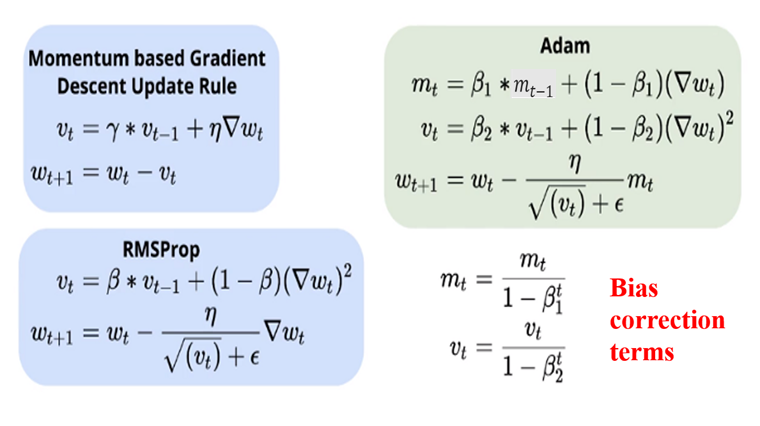

In [14]:
def Adam(X,y,epochs,convegrance,alpha,beta1,beta2,epslion=1e-8):
    theta_0,theta_1,vt_0,vt_1, mt_0, mt_1=0,0,0,0,0,0
    loss=[]
    m=(X.shape)[0]
    theta0List=[]
    theta1List=[]
    
    for count in range (epochs):
        i=count+1
        ypredicted=theta_0+theta_1*X
        MSE_1=(np.sum((ypredicted-y)**2)/(2*m))
        gra_0=(np.sum(ypredicted-y)/m)
        gra_1=((np.sum(((ypredicted-y).reshape(-1,1))*X.reshape(-1,1))/m))
        mt_0= beta1*mt_0+((1-beta1)*((gra_0)))
        mt_1= beta1*mt_1+((1-beta1)*((gra_1)))
        
        mt_0=(mt_0/(1-(beta1**i)))
        mt_1=(mt_1/(1-(beta1**i)))
        vt_0= beta2*vt_0+((1-beta2)*((gra_0)**2))
        vt_1= beta2*vt_1+((1-beta2)*((gra_1)**2))
        vt_0=(vt_0/(1-(beta2**i)))
        vt_1=(vt_1/(1-(beta2**i)))
        theta_0= theta_0 - (alpha*mt_0)/(np.sqrt(vt_0)+epslion)
        theta_1= theta_1 - (alpha*mt_1)/(np.sqrt(vt_1)+epslion)
        ypredicted=theta_0+theta_1*X
        MSE_2=(np.sum((ypredicted-y)**2)/(2*m))
        losss=MSE_1-MSE_2
        loss.append(MSE_2)
        theta0List.append(theta_0)
        theta1List.append(theta_1)
        
        if np.linalg.norm(losss)< convegrance:
            print("iterations=",count)
            return ypredicted,theta0List,theta1List,loss,theta_0,theta_1
        
            

    print("Not successful")   
    return ypredicted,theta0List,theta1List,loss,theta_0,theta_1

In [15]:
y_predicted,theta_1,theta_0,loss,th0,th1= Adam(X,y,4000,0.0001,0.01,0.87,0.89)

iterations= 417


The Score of the Adam trial 1 is=
0.9999948858434572


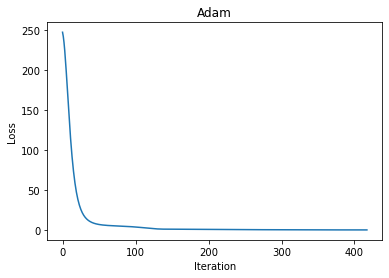

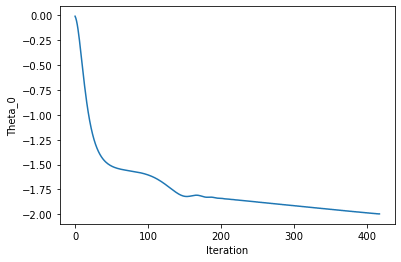

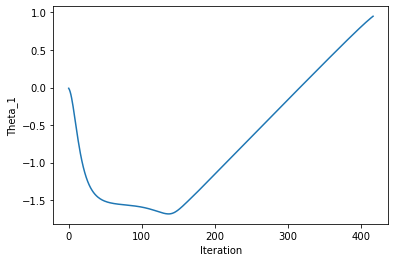

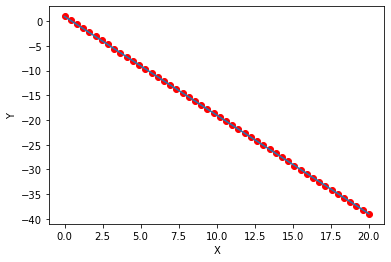

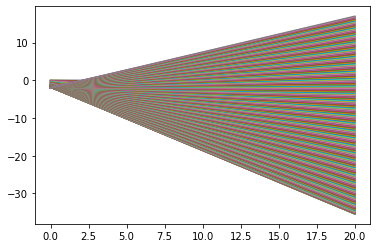

In [16]:
print("The Score of the Adam trial 1 is=")
print(r2_score(y,y_predicted))
plt.plot(loss)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title("Adam")
plt.show()
plt.plot(theta_0)
plt.xlabel('Iteration')
plt.ylabel('Theta_0')
plt.show()
plt.plot(theta_1)
plt.xlabel('Iteration')
plt.ylabel('Theta_1')
plt.show()
ynew=th0+th1*X
plt.plot(X,ynew)
plt.scatter(X, y,color='red')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()
for i in range(len(theta_0)):
    h0=theta_0[i]+theta_1[i]*X
    plt.plot(X,h0)
plt.show()


In [17]:
y_predicted,theta_1,theta_0,loss,th0,th1= Adam(X,y,4000,0.0001,0.05,0.5,0.5)

iterations= 100


The Score of the Adam trial 2 is=
0.9999900359465931


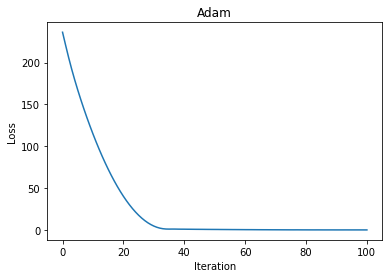

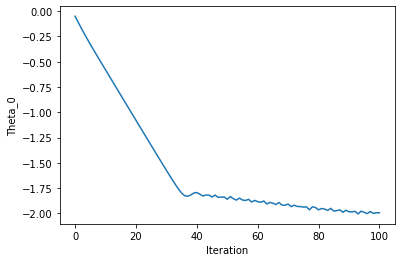

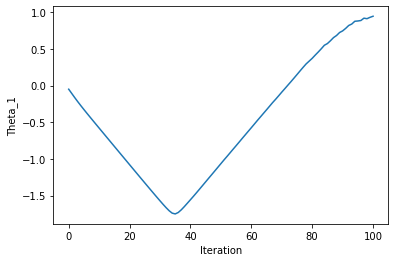

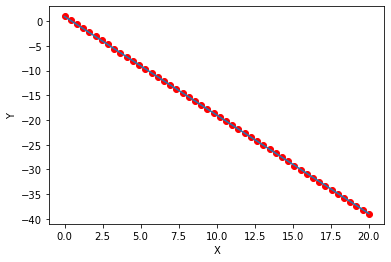

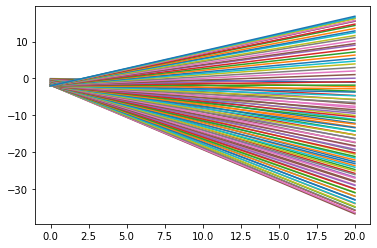

In [18]:
print("The Score of the Adam trial 2 is=")
print(r2_score(y,y_predicted))
plt.plot(loss)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title("Adam")
plt.show()
plt.plot(theta_0)
plt.xlabel('Iteration')
plt.ylabel('Theta_0')
plt.show()
plt.plot(theta_1)
plt.xlabel('Iteration')
plt.ylabel('Theta_1')
plt.show()
ynew=th0+th1*X
plt.plot(X,ynew)
plt.scatter(X, y,color='red')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

for i in range(len(theta_0)):
    h0=theta_0[i]+theta_1[i]*X
    plt.plot(X,h0)
plt.show()


In [19]:
y_predictedA,theta_1A,theta_0A,lossA,th0A,th1A= Adagrad(X,y,4000,0.0001,0.1)
y_predictedB,theta_1B,theta_0B,lossB,th0B,th1B= RmsProp(X,y,4000,0.0001,0.1,0.5)
y_predictedC,theta_1C,theta_0C,lossC,th0C,th1C= Adam(X,y,4000,0.0001,0.1,0.5,0.5)

iterations=  3297
iterations=  124
iterations= 492


In [20]:
print("The Score of the the three methods=")
print(r2_score(y,y_predictedA))
print(r2_score(y,y_predictedB))
print(r2_score(y,y_predictedC))

The Score of the the three methods=
0.9970899245848154
0.9971721193267569
0.9999850608372639


The Score of the Adam trials is=
0.9999900359465931


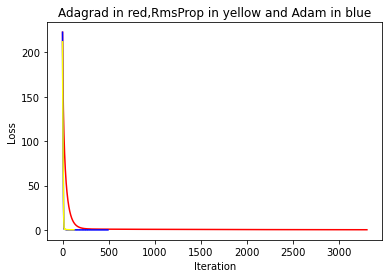

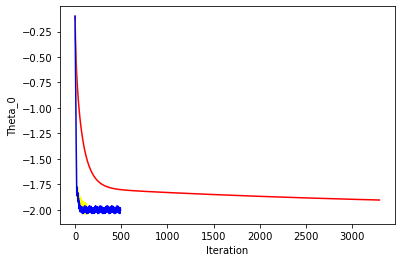

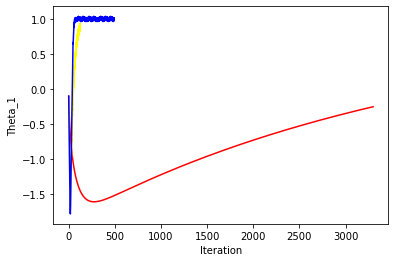

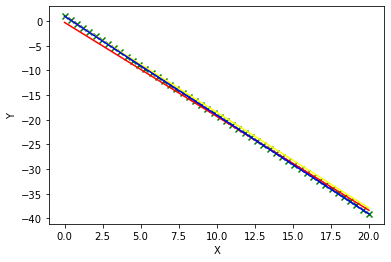

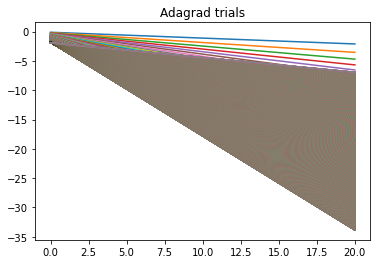

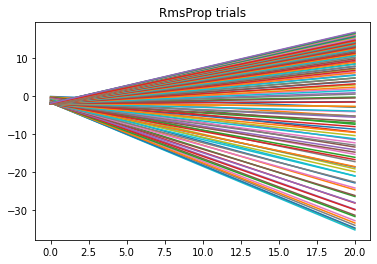

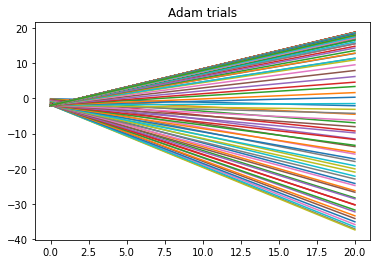

In [21]:
print("The Score of the Adam trials is=")
print(r2_score(y,y_predicted))
plt.plot(lossA,color='red')
plt.plot(lossC,color='blue')
plt.plot(lossB,color='yellow')

plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title("Adagrad in red,RmsProp in yellow and Adam in blue")
plt.show()

plt.plot(theta_0A,color='red')
plt.plot(theta_0B,color='yellow')
plt.plot(theta_0C,color='blue')
plt.xlabel('Iteration')
plt.ylabel('Theta_0')
plt.show()

plt.plot(theta_1A,color='red')
plt.plot(theta_1B,color='yellow')
plt.plot(theta_1C,color='blue')
plt.xlabel('Iteration')
plt.ylabel('Theta_1')
plt.show()

ynewA=th0A+th1A*X
plt.plot(X,ynewA,color='red')
ynewB=th0B+th1B*X
plt.plot(X,ynewB,color='yellow')
ynewC=th0C+th1C*X
plt.plot(X,ynewC,color='blue')
plt.scatter(X, y,color='green',marker='x')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

plt.title("Adagrad trials")
for i in range(len(theta_0A)):
    h0A=theta_0A[i]+theta_1A[i]*X
    plt.plot(X,h0A)
plt.show()

plt.title("RmsProp trials")
for i in range(len(theta_0B)):
    h0B=theta_0B[i]+theta_1B[i]*X
    plt.plot(X,h0B)
plt.show()

plt.title("Adam trials")
for i in range(len(theta_0C)):
    h0C=theta_0C[i]+theta_1C[i]*X
    plt.plot(X,h0C)
plt.show()


## Congratulations 
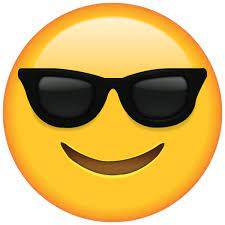